In [1]:
import glob
import numpy as np
import pandas as pd
import plotly as py
import cufflinks as cf
%matplotlib inline

In [2]:
train_A_over_logs = "../eval/20190317_RetinaNet_train_A_over_eval/test_night"
train_B_over_logs = "../eval/20190317_RetinaNet_train_B_over_eval/test_night"
train_C_over_logs = "../eval/20190317_RetinaNet_train_C_over_eval/test_night"
train_A_over_ganaug_025_logs = "../eval/20190324_RetinaNet_train_A_over_ganaug_025_eval/test_night"
train_A_over_ganaug_050_logs = "../eval/20190324_RetinaNet_train_A_over_ganaug_050_eval/test_night"
train_A_over_ganaug_050_augonlyasbase_logs = "../eval/20190327_RetinaNet_train_A_over_ganaug_050_augonlyasbase_eval/test_night"
pattern = "/**/*.txt"

#train_A_over_logs = "../eval/20190329_RetinaNet_train_A_over_class_eval/1"
#train_B_over_logs = "../eval/20190329_RetinaNet_train_B_over_class_eval/1"
#train_C_over_logs = "../eval/20190329_RetinaNet_train_C_over_class_eval/1"
#train_A_over_ganaug_025_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_025_class_eval/1"
#train_A_over_ganaug_050_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_050_class_eval/1"
#train_A_over_ganaug_050_augonlyasbase_logs = "../eval/20190327_RetinaNet_train_A_over_ganaug_050_augonlyasbase_class_eval/1"
#pattern = "/**/*test_model*.txt"

plot_title = "Impact of GAN-based augmentation: person (test set, night fraction)"

train_A_over_iteration = 105000 # None = best
train_B_over_iteration = 97500 # None = best
train_C_over_iteration = 65000 # None = best
train_A_over_ganaug_025_iteration = 42500 # None = best
train_A_over_ganaug_050_iteration = 102500 # None = best
train_A_over_ganaug_050_augonlyasbase_iteration = 47500 # None = best

In [3]:
train_A_over_logs = glob.glob(train_A_over_logs + pattern, recursive = True)
train_B_over_logs = glob.glob(train_B_over_logs + pattern, recursive = True)
train_C_over_logs = glob.glob(train_C_over_logs + pattern, recursive = True)

train_A_over_ganaug_025_logs = glob.glob(train_A_over_ganaug_025_logs + pattern, recursive = True)
train_A_over_ganaug_050_logs = glob.glob(train_A_over_ganaug_050_logs + pattern, recursive = True)
train_A_over_ganaug_050_augonlyasbase_logs = glob.glob(train_A_over_ganaug_050_augonlyasbase_logs + pattern, recursive = True)

In [4]:
def logs2df(logs, iteration = None):
    df_iterations = pd.DataFrame()
    last_iteration = -1
    for log in logs:
        df = pd.read_csv(log)
        df = df.drop(columns = ["Unnamed: 12"])
        df["Iteration"] = last_iteration if log.split("_model_")[-1].split("_")[0] == "final" else int(log.split("_model_")[-1].split("_")[0])
        df_iterations = pd.concat([df_iterations, df], axis = 0)
        df_iterations = df_iterations.reset_index(drop = True)
        last_iteration = df["Iteration"]
    df_iterations = df_iterations.sort_values(by = ['Iteration']).reset_index(drop = True)
    if iteration is not None:
        df_iterations = df_iterations.loc[df_iterations.Iteration == iteration].drop_duplicates(["Iteration"], keep = "last").reset_index(drop = True)
    df_iterations = df_iterations.set_index("Iteration")
    return df_iterations

## Last (or other specified) iterations ##

### --> All metrics are evaluated on the selected iteration <-- ###

### train_A_over ###

In [5]:
df_train_A_over = logs2df(train_A_over_logs, train_A_over_iteration)
df_train_A_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
105000,0.229694,0.529048,0.169722,0.129553,0.322344,0.39392,0.089034,0.304542,0.341172,0.250206,0.438456,0.460781


In [6]:
df_train_A_over_best_iter_per_metric = df_train_A_over.idxmax().to_frame().T
df_train_A_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,105000,105000,105000,105000,105000,105000,105000,105000,105000,105000,105000,105000


In [7]:
df_train_A_over_best_val_per_metric = df_train_A_over.max().to_frame().T
df_train_A_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.229694,0.529048,0.169722,0.129553,0.322344,0.39392,0.089034,0.304542,0.341172,0.250206,0.438456,0.460781


### train_B_over ###

In [8]:
df_train_B_over = logs2df(train_B_over_logs, train_B_over_iteration)
df_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
97500,0.249378,0.569171,0.186611,0.139854,0.351464,0.440922,0.093469,0.321735,0.359491,0.263614,0.462605,0.478073


In [9]:
df_train_B_over_best_iter_per_metric = df_train_B_over.idxmax().to_frame().T
df_train_B_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,97500,97500,97500,97500,97500,97500,97500,97500,97500,97500,97500,97500


In [10]:
df_train_B_over_best_val_per_metric = df_train_B_over.max().to_frame().T
df_train_B_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.249378,0.569171,0.186611,0.139854,0.351464,0.440922,0.093469,0.321735,0.359491,0.263614,0.462605,0.478073


### train_C_over ###

In [11]:
df_train_C_over = logs2df(train_C_over_logs, train_C_over_iteration)
df_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
65000,0.253451,0.581621,0.192043,0.140207,0.363751,0.42637,0.09565,0.327692,0.365151,0.269937,0.47242,0.479317


In [12]:
df_train_C_over_best_iter_per_metric = df_train_C_over.idxmax().to_frame().T
df_train_C_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000


In [13]:
df_train_C_over_best_val_per_metric = df_train_C_over.max().to_frame().T
df_train_C_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.253451,0.581621,0.192043,0.140207,0.363751,0.42637,0.09565,0.327692,0.365151,0.269937,0.47242,0.479317


### train_A_over_ganaug_025 ###

In [14]:
df_train_A_over_ganaug_025 = logs2df(train_A_over_ganaug_025_logs, train_A_over_ganaug_025_iteration)
df_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
42500,0.215831,0.484303,0.164046,0.10912,0.326285,0.417646,0.083167,0.290929,0.333617,0.22948,0.457375,0.487845


In [15]:
df_train_A_over_ganaug_025_best_iter_per_metric = df_train_A_over_ganaug_025.idxmax().to_frame().T
df_train_A_over_ganaug_025_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,42500,42500,42500,42500,42500,42500,42500,42500,42500,42500,42500,42500


In [16]:
df_train_A_over_ganaug_025_best_val_per_metric = df_train_A_over_ganaug_025.max().to_frame().T
df_train_A_over_ganaug_025_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.215831,0.484303,0.164046,0.10912,0.326285,0.417646,0.083167,0.290929,0.333617,0.22948,0.457375,0.487845


### train_A_over_ganaug_050 ###

In [17]:
df_train_A_over_ganaug_050 = logs2df(train_A_over_ganaug_050_logs, train_A_over_ganaug_050_iteration)
df_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
102500,0.211829,0.471275,0.163752,0.107435,0.311114,0.426584,0.084431,0.285918,0.32506,0.231547,0.42336,0.473069


In [18]:
df_train_A_over_ganaug_050_best_iter_per_metric = df_train_A_over_ganaug_050.idxmax().to_frame().T
df_train_A_over_ganaug_050_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,102500,102500,102500,102500,102500,102500,102500,102500,102500,102500,102500,102500


In [19]:
df_train_A_over_ganaug_050_best_val_per_metric = df_train_A_over_ganaug_050.max().to_frame().T
df_train_A_over_ganaug_050_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.211829,0.471275,0.163752,0.107435,0.311114,0.426584,0.084431,0.285918,0.32506,0.231547,0.42336,0.473069


### train_A_over_ganaug_050_augonlyasbase ###

In [20]:
df_train_A_over_ganaug_050_augonlyasbase = logs2df(train_A_over_ganaug_050_augonlyasbase_logs, train_A_over_ganaug_050_augonlyasbase_iteration)
df_train_A_over_ganaug_050_augonlyasbase.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
47500,0.200919,0.46808,0.145021,0.102548,0.29592,0.354509,0.083801,0.274479,0.310958,0.219624,0.408924,0.405876


In [21]:
df_train_A_over_ganaug_050_augonlyasbase_best_iter_per_metric = df_train_A_over_ganaug_050_augonlyasbase.idxmax().to_frame().T
df_train_A_over_ganaug_050_augonlyasbase_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,47500,47500,47500,47500,47500,47500,47500,47500,47500,47500,47500,47500


In [22]:
df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric = df_train_A_over_ganaug_050_augonlyasbase.max().to_frame().T
df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.200919,0.46808,0.145021,0.102548,0.29592,0.354509,0.083801,0.274479,0.310958,0.219624,0.408924,0.405876


## Improvements ##

### train_A_over --> train_B_over ###

In [23]:
df_train_A_over_TO_train_B_over = df_train_B_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_B_over["Comparison"] = "A to B"
df_train_A_over_TO_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.019684,0.040122,0.01689,0.010301,0.02912,0.047002,0.004434,0.017192,0.018318,0.013408,0.02415,0.017292,A to B


In [24]:
df_train_A_over_TO_train_B_over_rel = (df_train_B_over_best_val_per_metric - df_train_A_over_best_val_per_metric) / df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_B_over_rel["Comparison"] = "A to B"
df_train_A_over_TO_train_B_over_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.085697,0.075839,0.099513,0.079511,0.090338,0.119317,0.049804,0.056452,0.053692,0.053587,0.055079,0.037527,A to B


### train_A_over --> train_C_over ###

In [25]:
df_train_A_over_TO_train_C_over = df_train_C_over_best_val_per_metric - df_train_A_over_best_val_per_metric
#df_train_A_over_TO_train_C_over["Comparison"] = "A to C"
df_train_A_over_TO_train_C_over["Comparison"] = "Day to Day-R50-Real"
df_train_A_over_TO_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.023756,0.052573,0.022321,0.010653,0.041406,0.032449,0.006616,0.023149,0.023978,0.019731,0.033965,0.018536,Day to Day-R50-Real


In [26]:
df_train_A_over_TO_train_C_over_rel = (df_train_C_over_best_val_per_metric - df_train_A_over_best_val_per_metric) / df_train_A_over_best_val_per_metric
#df_train_A_over_TO_train_C_over_rel["Comparison"] = "day to day_r50real"
df_train_A_over_TO_train_C_over_rel["Comparison"] = "Day to Day-R50-Real"
df_train_A_over_TO_train_C_over_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.103426,0.099372,0.131516,0.082232,0.128454,0.082376,0.074306,0.076013,0.070282,0.078859,0.077464,0.040227,Day to Day-R50-Real


### train_A_over --> train_A_over_ganaug_025 ###

In [27]:
df_train_A_over_TO_train_A_over_ganaug_025 = df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_025["Comparison"] = "A to A25"
df_train_A_over_TO_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.013864,-0.044746,-0.005676,-0.020433,0.003941,0.023725,-0.005868,-0.013613,-0.007555,-0.020726,0.01892,0.027063,A to A25


In [28]:
df_train_A_over_TO_train_A_over_ganaug_025_rel = (df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_best_val_per_metric) / df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_025_rel["Comparison"] = "A to A25"
df_train_A_over_TO_train_A_over_ganaug_025_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.060358,-0.084578,-0.033443,-0.157718,0.012226,0.060229,-0.065904,-0.0447,-0.022145,-0.082836,0.043151,0.058734,A to A25


### train_A_over --> train_A_over_ganaug_050 ###

In [29]:
df_train_A_over_TO_train_A_over_ganaug_050 = df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_best_val_per_metric
#df_train_A_over_TO_train_A_over_ganaug_050["Comparison"] = "A to A50"
df_train_A_over_TO_train_A_over_ganaug_050["Comparison"] = "Day to Day-R50-Fake"
df_train_A_over_TO_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.017866,-0.057774,-0.005969,-0.022119,-0.01123,0.032664,-0.004604,-0.018625,-0.016113,-0.01866,-0.015095,0.012288,Day to Day-R50-Fake


In [30]:
df_train_A_over_TO_train_A_over_ganaug_050_rel = (df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_best_val_per_metric) / df_train_A_over_best_val_per_metric
#df_train_A_over_TO_train_A_over_ganaug_050_rel["Comparison"] = "A to A50"
df_train_A_over_TO_train_A_over_ganaug_050_rel["Comparison"] = "Day to Day-R50-Fake"
df_train_A_over_TO_train_A_over_ganaug_050_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.07778,-0.109203,-0.03517,-0.170729,-0.034839,0.08292,-0.051706,-0.061156,-0.047227,-0.074577,-0.034428,0.026668,Day to Day-R50-Fake


### train_A_over_ganaug_050_augonlyasbase --> train_A_over_ganaug_025 ###

In [31]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025 = df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025["Comparison"] = "A50aoab to A25"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.014912,0.016223,0.019025,0.006572,0.030365,0.063136,-0.000634,0.016451,0.022659,0.009856,0.048452,0.081969,A50aoab to A25


In [32]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025_rel = (df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric) / df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025_rel["Comparison"] = "A50aoab to A25"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.074217,0.034658,0.131184,0.064088,0.102612,0.178094,-0.007564,0.059934,0.072869,0.044876,0.118486,0.201955,A50aoab to A25


### train_A_over_ganaug_050_augonlyasbase --> train_A_over_ganaug_050 ###

In [33]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050 = df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
#df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050["Comparison"] = "A50aoab to A50"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050["Comparison"] = "Day/2 to Day-A50-Fake"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.01091,0.003195,0.018731,0.004887,0.015194,0.072075,0.00063,0.011439,0.014102,0.011922,0.014437,0.067193,Day/2 to Day-A50-Fake


In [34]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050_rel = (df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric) / df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
#df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050_rel["Comparison"] = "A50aoab to A50"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050_rel["Comparison"] = "Day/2 to Day-A50-Fake"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.0543,0.006826,0.129163,0.047651,0.051345,0.203309,0.00752,0.041675,0.045349,0.054285,0.035304,0.165551,Day/2 to Day-A50-Fake


### train_A_over_ganaug_050_augonlyasbase --> train_C ###

In [35]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over = df_train_C_over_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
#df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over["Comparison"] = "A50aoab to C"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over["Comparison"] = "Day/2 to Day-A50-Real"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.052532,0.113541,0.047022,0.037659,0.06783,0.07186,0.01185,0.053213,0.054193,0.050313,0.063496,0.073441,Day/2 to Day-A50-Real


In [36]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over_rel = (df_train_C_over_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric) / df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
#df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over_rel["Comparison"] = "A50aoab to C"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over_rel["Comparison"] = "Day/2 to Day-A50-Real"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.261458,0.242568,0.324239,0.367227,0.229219,0.202704,0.141402,0.193869,0.174276,0.229086,0.155277,0.180944,Day/2 to Day-A50-Real


## Combine ##

In [37]:
#df_combined = pd.concat([df_train_A_over_TO_train_B_over, df_train_A_over_TO_train_C_over, df_train_A_over_TO_train_A_over_ganaug_025, df_train_A_over_TO_train_A_over_ganaug_050, df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025, df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050], axis = 0)
df_combined = pd.concat([df_train_A_over_TO_train_C_over, df_train_A_over_TO_train_A_over_ganaug_050, df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over, df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050], axis = 0)
df_combined_rel = pd.concat([df_train_A_over_TO_train_C_over_rel, df_train_A_over_TO_train_A_over_ganaug_050_rel, df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over_rel, df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050_rel], axis = 0)

In [38]:
df_combined = df_combined.set_index("Comparison")
df_combined.head()

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Comparison,,,,,,,,,,,,
Day to Day-R50-Real,0.023756,0.052573,0.022321,0.010653,0.041406,0.032449,0.006616,0.023149,0.023978,0.019731,0.033965,0.018536
Day to Day-R50-Fake,-0.017866,-0.057774,-0.005969,-0.022119,-0.011230,0.032664,-0.004604,-0.018625,-0.016113,-0.018660,-0.015095,0.012288
Day/2 to Day-A50-Real,0.052532,0.113541,0.047022,0.037659,0.067830,0.071860,0.011850,0.053213,0.054193,0.050313,0.063496,0.073441
Day/2 to Day-A50-Fake,0.010910,0.003195,0.018731,0.004887,0.015194,0.072075,0.000630,0.011439,0.014102,0.011922,0.014437,0.067193


In [39]:
df_combined_rel = df_combined_rel.set_index("Comparison")
df_combined_rel.head()

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Comparison,,,,,,,,,,,,
Day to Day-R50-Real,0.103426,0.099372,0.131516,0.082232,0.128454,0.082376,0.074306,0.076013,0.070282,0.078859,0.077464,0.040227
Day to Day-R50-Fake,-0.077780,-0.109203,-0.035170,-0.170729,-0.034839,0.082920,-0.051706,-0.061156,-0.047227,-0.074577,-0.034428,0.026668
Day/2 to Day-A50-Real,0.261458,0.242568,0.324239,0.367227,0.229219,0.202704,0.141402,0.193869,0.174276,0.229086,0.155277,0.180944
Day/2 to Day-A50-Fake,0.054300,0.006826,0.129163,0.047651,0.051345,0.203309,0.007520,0.041675,0.045349,0.054285,0.035304,0.165551


Text(0, 0.5, 'Absolute change in score')

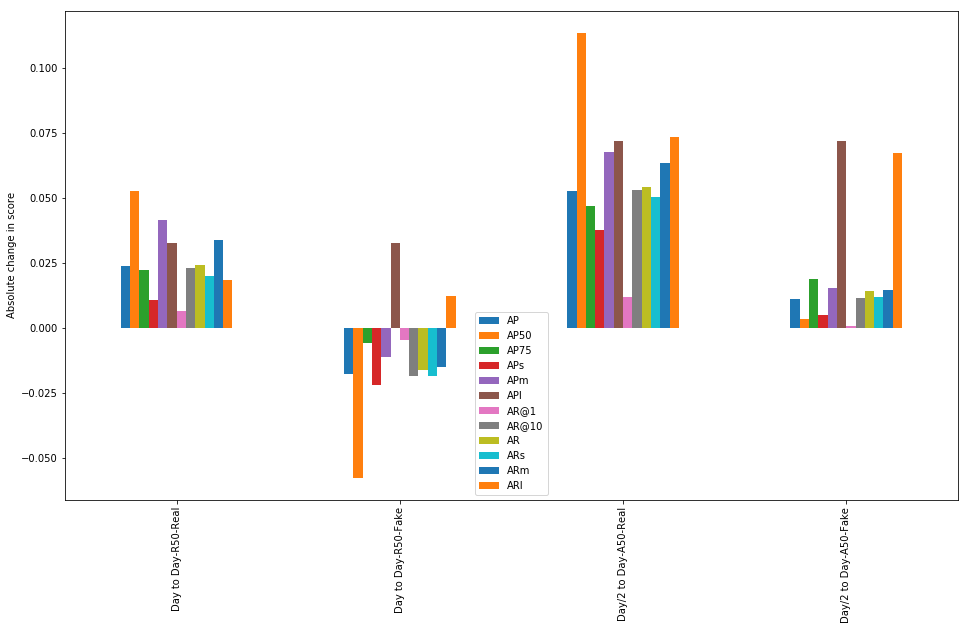

In [40]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score")

In [41]:
cf.go_offline(connected = True)
config = {
    "modeBarButtonsToRemove": ["sendDataToCloud"],
    "displaylogo": False
}
layout = {
    "title": plot_title,
    "yaxis": {
        "title": "Absolute change in score"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)

In [42]:
df_combined_rel = df_combined_rel * 100

Text(0, 0.5, 'Relative change in score (%)')

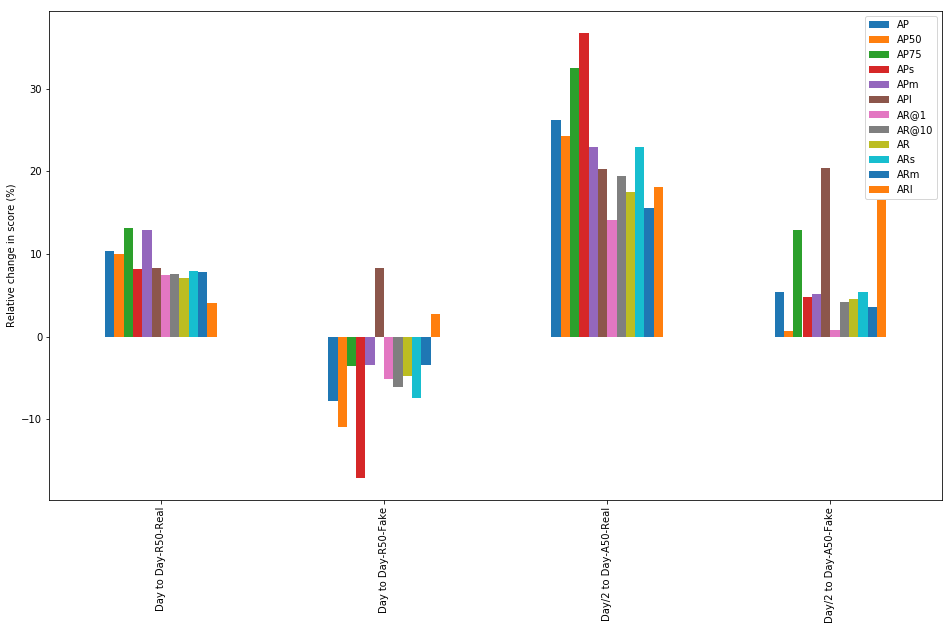

In [43]:
ax = df_combined_rel.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Relative change in score (%)")

In [49]:
layout = {
    "title": plot_title,
    "titlefont": {
        "size": 28
    },    
    "xaxis": {
        "tickfont": {
            "size": 18
        }
    },    
    "yaxis": {
        "title": "Relative score change (%)",
        "range": [-20, 40],
        "dtick": 5,
        "titlefont": {
            "size": 28
        },
        "tickfont": {
            "size": 24
        }
    },
    "width": 1280,
    "height": 720,
    "legend": {
        "x": 1.00,
        "y": 0.95,
        "orientation": "v",
        "font": {
            "size": 28,
        },        
    }
}

fig = df_combined_rel.iplot(kind = "bar", y = ["AP", "APs", "APm", "APl", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)